In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
(movie_train , label_train) , (movie_test , label_test) = imdb.load_data(num_words = 10000)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
y_train = np.asarray(label_train).astype('float32')
y_test = np.asarray(label_test).astype('float32')

In [4]:
word_to_index = imdb.get_word_index()
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
def vectorize_sequence(sequences , dimension = 10000): #function to transfer the values into one got vector
    
    '''
    Returns a one hot vector of the sequences of the dimension.
    '''
    result = np.zeros((len(sequences) , dimension))
    
    for i,sequence in enumerate(sequences):
        result[i , sequence] = 1
    
    return result

In [6]:
X_train = vectorize_sequence(movie_train , dimension = 10000) 
X_test = vectorize_sequence(movie_train , dimension = 10000) 

In [7]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
X_val = X_train[:10000] 
y_val = y_train[:10000] 
partial_X_train = X_train[10000:] 
partial_y_train = y_train[10000:] 

In [9]:
model = Sequential()

model.add(Dense(16 , activation = 'relu' , input_shape = (10000 , )))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs =10,
                    batch_size = 128,
                    validation_data = (X_val , y_val),
                    )

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 33s 2ms/sample - loss: 0.4144 - accuracy: 0.8418 - val_loss: 0.2937 - val_accuracy: 0.8890
Epoch 2/10
15000/15000 [==============================] - 3s 168us/sample - loss: 0.2190 - accuracy: 0.9199 - val_loss: 0.2725 - val_accuracy: 0.8926
Epoch 3/10
15000/15000 [==============================] - 2s 139us/sample - loss: 0.1596 - accuracy: 0.9415 - val_loss: 0.2880 - val_accuracy: 0.8893
Epoch 4/10
15000/15000 [==============================] - 2s 135us/sample - loss: 0.1228 - accuracy: 0.9565 - val_loss: 0.3219 - val_accuracy: 0.8856
Epoch 5/10
15000/15000 [==============================] - 2s 137us/sample - loss: 0.0937 - accuracy: 0.9690 - val_loss: 0.3580 - val_accuracy: 0.8793
Epoch 6/10
15000/15000 [==============================] - 2s 137us/sample - loss: 0.0711 - accuracy: 0.9764 - val_loss: 0.4102 - val_accuracy: 0.8795
Epoch 7/10
15000/15000 [===========================

In [13]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.414420,0.841800,0.293687,0.8890
1,0.219023,0.919867,0.272477,0.8926
2,0.159648,0.941533,0.287955,0.8893
3,0.122821,0.956467,0.321910,0.8856
4,0.093660,0.969000,0.358014,0.8793


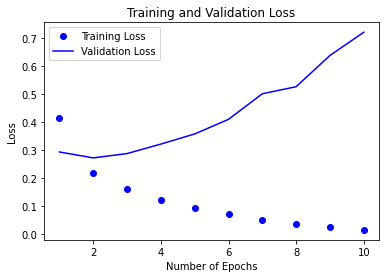

In [14]:
epochs = range(1 , len(df) + 1)

plt.plot(epochs , df['loss'] , 'bo' , label = 'Training Loss')
plt.plot(epochs , df['val_loss'] , 'b' , label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

In [15]:
new_model = Sequential()
new_model.add(Dense(16 , activation = 'relu' , input_shape = (10000 , )))
new_model.add(Dense(16 , activation = 'relu'))
new_model.add(Dense(1 , activation = 'sigmoid'))

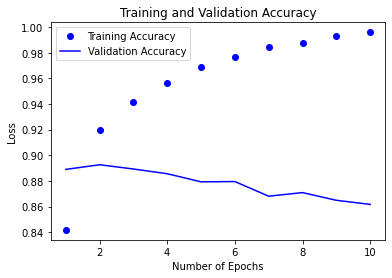

In [16]:
epochs = range(1 , len(df) + 1)

plt.plot(epochs , df['accuracy'] , 'bo' , label = 'Training Accuracy')
plt.plot(epochs , df['val_accuracy'] , 'b' , label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
new_model = Sequential()

new_model.add(Dense(16 , activation = 'relu' , input_shape = (10000 , )))
new_model.add(Dense(16 , activation = 'relu'))
new_model.add(Dense(1 , activation = 'sigmoid'))

In [18]:
new_model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [21]:
history =new_model.fit(X_train,y_train,epochs = 4,batch_size = 25)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 19s 766us/sample - loss: 0.1473 - accuracy: 0.9460
Epoch 2/4
25000/25000 [==============================] - 5s 181us/sample - loss: 0.1328 - accuracy: 0.9534
Epoch 3/4
25000/25000 [==============================] - 4s 160us/sample - loss: 0.1197 - accuracy: 0.9587
Epoch 4/4
25000/25000 [==============================] - 4s 159us/sample - loss: 0.1084 - accuracy: 0.9645


In [20]:
new_model.evaluate(X_test , y_test , verbose = 2) 

25000/1 - 20s - loss: 2.3519 - accuracy: 0.4974


[2.5745152346801756, 0.4974]